<a href="https://colab.research.google.com/github/Pratham2445/ML_Project/blob/main/PrathamML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/content/student_spending (1).csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re

In [ ]:
df = pd.read_csv('/content/student_spending (1).csv')

In [ ]:
df.head(10)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
0,0,19,Non-binary,Freshman,Psychology,958,270,5939,709,296,123,188,41,78,134,127,72,Credit/Debit Card
1,1,24,Female,Junior,Economics,1006,875,4908,557,365,85,252,74,92,226,129,68,Credit/Debit Card
2,2,24,Non-binary,Junior,Economics,734,928,3051,666,220,137,99,130,23,239,112,133,Cash
3,3,23,Female,Senior,Computer Science,617,265,4935,652,289,114,223,99,30,163,105,55,Mobile Payment App
4,4,20,Female,Senior,Computer Science,810,522,3887,825,372,168,194,48,71,88,71,104,Credit/Debit Card
5,5,25,Non-binary,Sophomore,Computer Science,523,790,3151,413,386,122,131,73,38,234,108,99,Mobile Payment App
6,6,23,Female,Freshman,Engineering,1354,69,4973,812,398,101,213,21,38,157,117,48,Credit/Debit Card
7,7,23,Female,Junior,Economics,631,748,3966,571,269,92,251,37,90,152,56,62,Mobile Payment App
8,8,22,Non-binary,Senior,Computer Science,1402,248,5638,599,354,82,155,123,41,162,172,194,Credit/Debit Card
9,9,18,Female,Junior,Computer Science,1423,74,3977,626,249,117,123,51,74,243,34,196,Mobile Payment App


In [ ]:
df.tail(10)

,Unnamed: 0,age,gender,year_in_school,major,monthly_income,financial_aid,tuition,housing,food,transportation,books_supplies,entertainment,personal_care,technology,health_wellness,miscellaneous,preferred_payment_method
990,990,20,Non-binary,Senior,Psychology,1412,155,5576,443,305,119,136,120,41,290,30,91,Mobile Payment App
991,991,24,Non-binary,Junior,Psychology,1391,259,3572,755,136,55,86,62,66,187,153,23,Cash
992,992,20,Male,Freshman,Economics,1293,672,5635,435,389,192,87,23,64,67,77,137,Credit/Debit Card
993,993,20,Male,Freshman,Psychology,1380,594,3658,739,277,187,92,144,69,283,68,21,Mobile Payment App
994,994,22,Male,Senior,Psychology,764,286,5430,589,387,61,68,46,96,86,46,85,Mobile Payment App
995,995,22,Female,Senior,Biology,1346,520,3688,969,152,194,151,42,38,252,65,163,Cash
996,996,19,Female,Senior,Biology,1407,560,3380,508,265,52,206,40,98,274,84,135,Mobile Payment App
997,997,20,Male,Junior,Economics,957,393,3497,723,339,139,69,112,46,284,57,28,Mobile Payment App
998,998,22,Non-binary,Senior,Economics,1174,612,3649,543,237,123,200,129,90,190,101,65,Mobile Payment App
999,999,24,Non-binary,Sophomore,Computer Science,541,640,5965,609,270,191,215,139,43,281,88,145,Cash


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Unnamed: 0                1000 non-null   int64 
 1   age                       1000 non-null   int64 
 2   gender                    1000 non-null   object
 3   year_in_school            1000 non-null   object
 4   major                     1000 non-null   object
 5   monthly_income            1000 non-null   int64 
 6   financial_aid             1000 non-null   int64 
 7   tuition                   1000 non-null   int64 
 8   housing                   1000 non-null   int64 
 9   food                      1000 non-null   int64 
 10  transportation            1000 non-null   int64 
 11  books_supplies            1000 non-null   int64 
 12  entertainment             1000 non-null   int64 
 13  personal_care             1000 non-null   int64 
 14  technology               

In [ ]:
missing_values = df.iloc[:, :10].isnull().sum()
missing_values

Unnamed: 0        0
age               0
gender            0
year_in_school    0
major             0
monthly_income    0
financial_aid     0
tuition           0
housing           0
food              0
dtype: int64

In [ ]:
print(df.columns)

Index(['Unnamed: 0', 'age', 'gender', 'year_in_school', 'major',
       'monthly_income', 'financial_aid', 'tuition', 'housing', 'food',
       'transportation', 'books_supplies', 'entertainment', 'personal_care',
       'technology', 'health_wellness', 'miscellaneous',
       'preferred_payment_method'],
      dtype='object')


In [ ]:
categorical_columns = ['gender', 'year_in_school', 'major', 'preferred_payment_method']

for column in categorical_columns:
    df[column], _ = pd.factorize(df[column])

df.drop('Unnamed: 0', axis=1, inplace=True)

data_np = df.to_numpy()

data_np.shape, data_np.dtype

((1000, 17), dtype('int64'))

In [ ]:
nan_check = np.isnan(data_np).any()

In [ ]:
nan_check

False

In [ ]:
stats = {
    'min': np.min(data_np, axis=0),
    'max': np.max(data_np, axis=0),
    'mean': np.mean(data_np, axis=0),
    'std': np.std(data_np, axis=0),
}

stats


{'min': array([  18,    0,    0,    0,  501,    0, 3003,  401,  100,   50,   50,
          20,   20,   50,   30,   20,    0]),
 'max': array([  25,    2,    3,    4, 1500, 1000, 6000, 1000,  400,  200,  300,
         150,  100,  300,  200,  200,    2]),
 'mean': array([2.167500e+01, 1.035000e+00, 1.493000e+00, 2.076000e+00,
        1.020650e+03, 5.047710e+02, 4.520395e+03, 6.960060e+02,
        2.526420e+02, 1.246370e+02, 1.747610e+02, 8.481400e+01,
        6.069900e+01, 1.783040e+02, 1.143100e+02, 1.089100e+02,
        1.010000e+00]),
 'std': array([2.32150275e+00, 8.22055351e-01, 1.11711727e+00, 1.42766383e+00,
        2.93694204e+02, 2.86948993e+02, 8.60227508e+02, 1.71132989e+02,
        8.69061208e+01, 4.35362060e+01, 7.23683071e+01, 3.79514612e+01,
        2.28865550e+01, 7.17085600e+01, 4.95667419e+01, 5.23860086e+01,
        8.30602191e-01])}

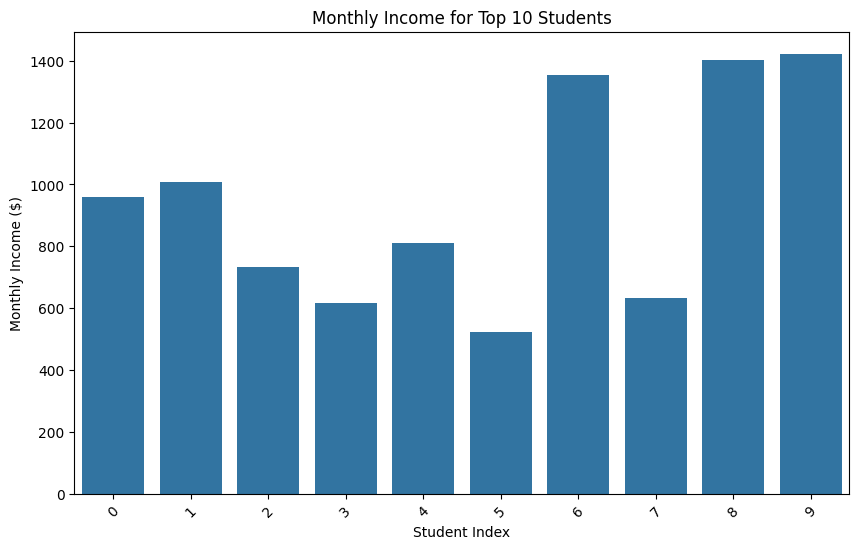

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

top_10 = df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y="monthly_income", data=top_10)
plt.title('Monthly Income for Top 10 Students')
plt.ylabel('Monthly Income ($)')
plt.xlabel('Student Index')
plt.xticks(rotation=45)
plt.show()

In [ ]:
print(df.columns)

Index(['age', 'gender', 'year_in_school', 'major', 'monthly_income',
       'financial_aid', 'tuition', 'housing', 'food', 'transportation',
       'books_supplies', 'entertainment', 'personal_care', 'technology',
       'health_wellness', 'miscellaneous', 'preferred_payment_method'],
      dtype='object')


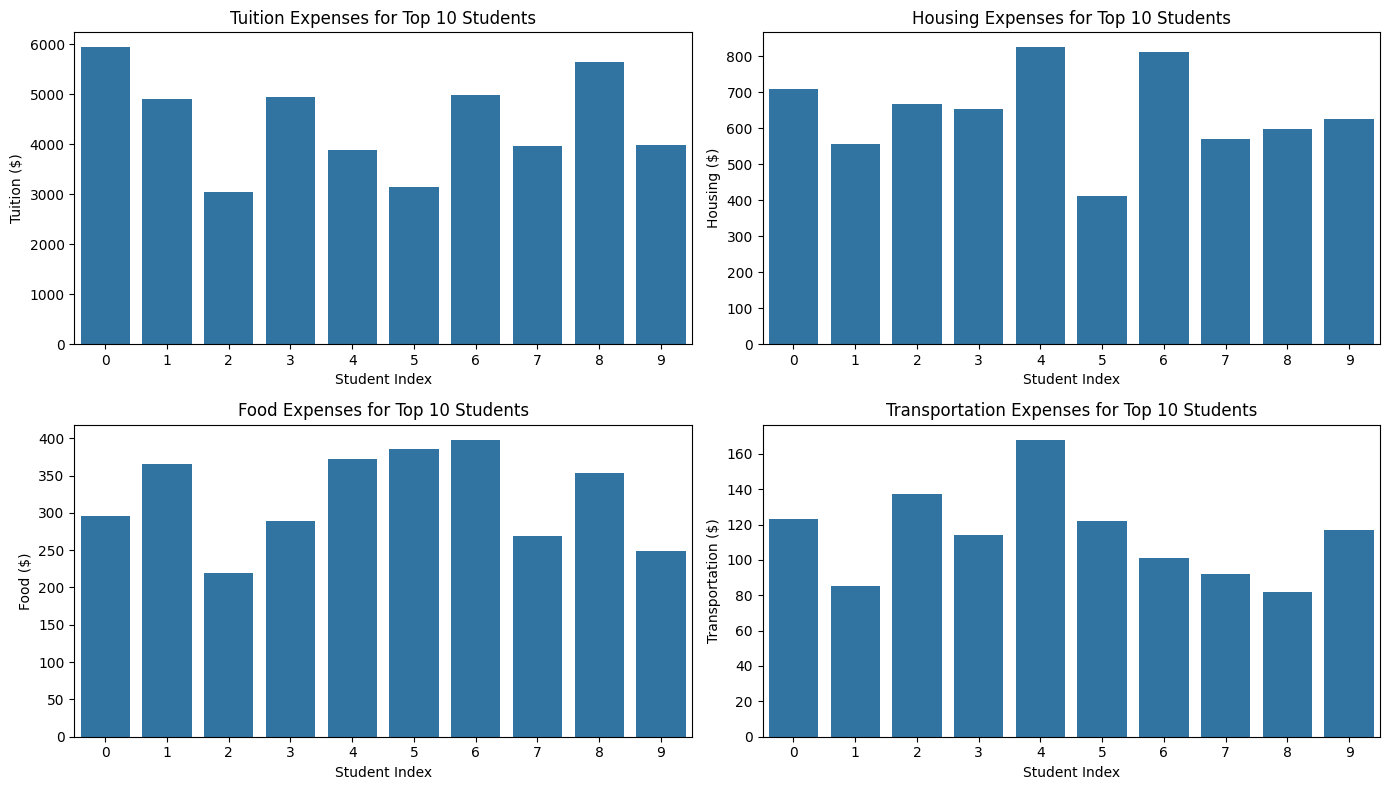

In [ ]:
expenses_columns = ['tuition', 'housing', 'food', 'transportation']
plt.figure(figsize=(14, 8))

for i, column in enumerate(expenses_columns, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(x=top_10.index, y=column, data=top_10)
    plt.title(f'{column.capitalize()} Expenses for Top 10 Students')
    plt.ylabel(f'{column.capitalize()} ($)')
    plt.xlabel('Student Index')

plt.tight_layout()
plt.show()


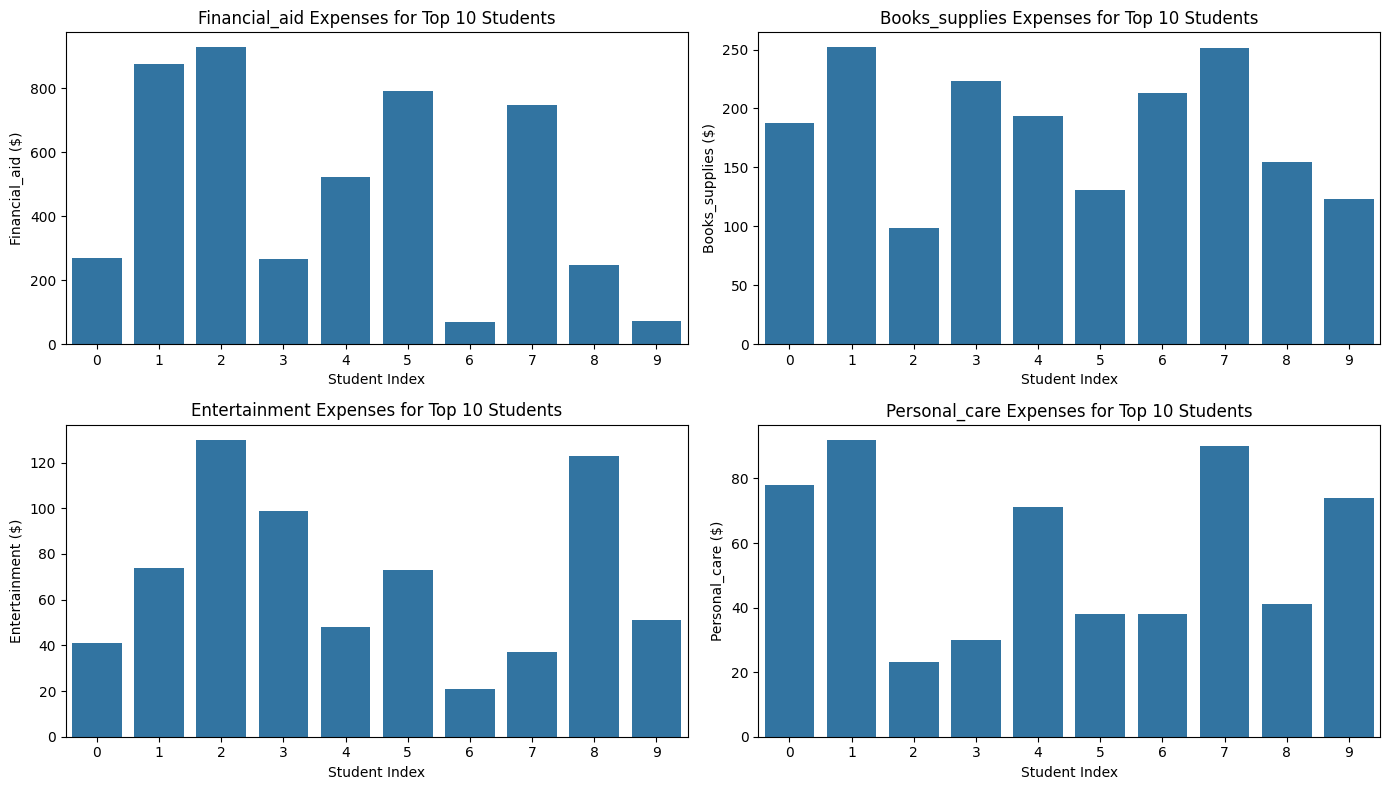

In [ ]:
expenses_columns = ['financial_aid', 'books_supplies', 'entertainment', 'personal_care']
plt.figure(figsize=(14, 8))

for i, column in enumerate(expenses_columns, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(x=top_10.index, y=column, data=top_10)
    plt.title(f'{column.capitalize()} Expenses for Top 10 Students')
    plt.ylabel(f'{column.capitalize()} ($)')
    plt.xlabel('Student Index')

plt.tight_layout()
plt.show()

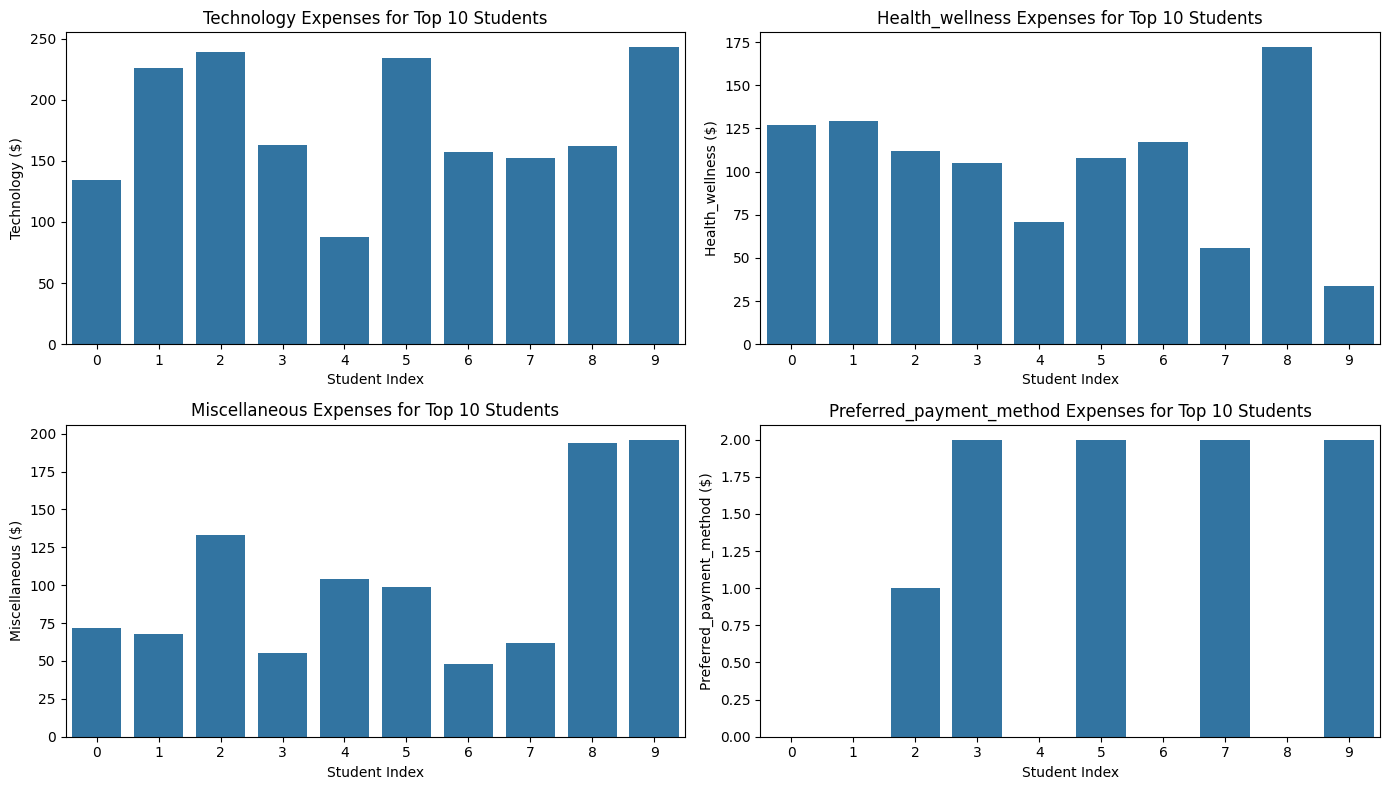

In [ ]:
expenses_columns = ['technology', 'health_wellness', 'miscellaneous', 'preferred_payment_method']
plt.figure(figsize=(14, 8))

for i, column in enumerate(expenses_columns, start=1):
    plt.subplot(2, 2, i)
    sns.barplot(x=top_10.index, y=column, data=top_10)
    plt.title(f'{column.capitalize()} Expenses for Top 10 Students')
    plt.ylabel(f'{column.capitalize()} ($)')
    plt.xlabel('Student Index')

plt.tight_layout()
plt.show()

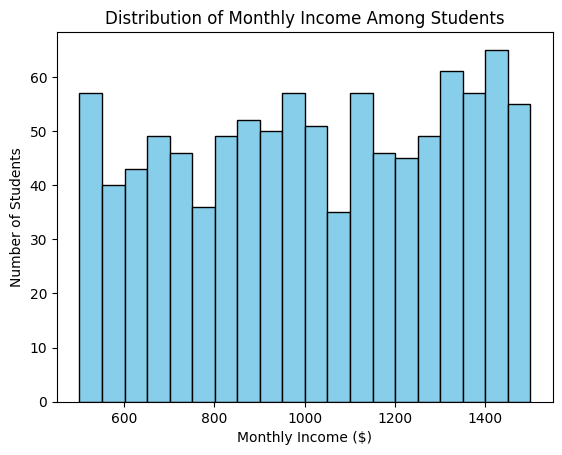

In [ ]:
import matplotlib.pyplot as plt

monthly_income = data_np[:, 4]

plt.hist(monthly_income, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Income Among Students')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Students')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data_np[:, :-1]
y = data_np[:, -1]

scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 16), (200, 16), (800,), (200,))

In [ ]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(y_train_categorical.shape[1], activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train_categorical, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

test_loss, test_accuracy = model.evaluate(X_test, y_test_categorical, verbose=0)

test_loss, test_accuracy

(1.769519329071045, 0.33000001311302185)

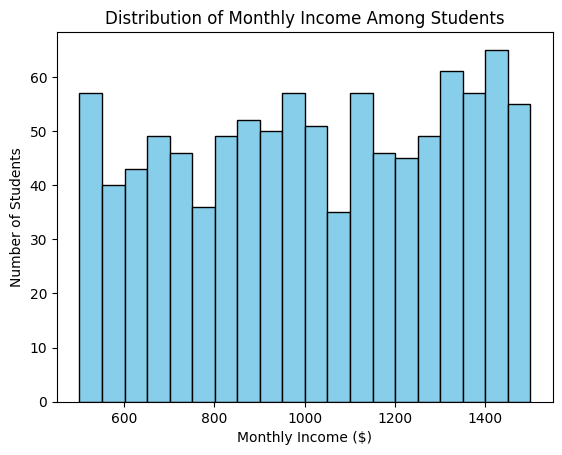

Descriptive Statistics for Numerical Variables:
        Unnamed: 0          age  monthly_income  financial_aid      tuition  \
count  1000.000000  1000.000000     1000.000000    1000.000000  1000.000000   
mean    499.500000    21.675000     1020.650000     504.771000  4520.395000   
std     288.819436     2.322664      293.841161     287.092575   860.657944   
min       0.000000    18.000000      501.000000       0.000000  3003.000000   
25%     249.750000    20.000000      770.750000     261.000000  3779.750000   
50%     499.500000    22.000000     1021.000000     513.000000  4547.500000   
75%     749.250000    24.000000     1288.250000     751.500000  5285.000000   
max     999.000000    25.000000     1500.000000    1000.000000  6000.000000   

          housing         food  transportation  books_supplies  entertainment  \
count  1000.00000  1000.000000      1000.00000     1000.000000    1000.000000   
mean    696.00600   252.642000       124.63700      174.761000      84.814000 

<ipython-input-23-a9902bbc03a6>:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


In [ ]:
# Whole Statistical Analysis in one code
import numpy as np
import pandas as pd

df = pd.read_csv('/content/student_spending (1).csv')

numerical_stats = df.describe()

# Distribution of Monthly Income
import matplotlib.pyplot as plt
plt.hist(df['monthly_income'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Income Among Students')
plt.xlabel('Monthly Income ($)')
plt.ylabel('Number of Students')
plt.show()

# Correlation Analysis
correlation_matrix = df.corr()

# Categorical Variable Analysis - Count of Each Category
categorical_counts = {}
for column in df.select_dtypes(include=['object']):
    categorical_counts[column] = df[column].value_counts()

# Missing Values Analysis
missing_values_count = df.isnull().sum()

# Display the results
print("Descriptive Statistics for Numerical Variables:")
print(numerical_stats)

print("\nCorrelation Matrix:")
print(correlation_matrix)

print("\nCategorical Variable Analysis - Count of Each Category:")
for column, counts in categorical_counts.items():
    print(f"\n{column.capitalize()} Counts:")
    print(counts)

print("\nMissing Values Analysis:")
print(missing_values_count)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification

# Generate synthetic data for demonstration purposes
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Neural Network": MLPClassifier()
}

# Evaluate classifiers using cross-validation and various metrics
metrics = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
results = {}

for name, clf in classifiers.items():
    scores = cross_validate(clf, X, y, cv=5, scoring=metrics)
    results[name] = {metric: scores[f'test_{metric}'].mean() for metric in metrics}

# Display results
print("Evaluation Metrics:")
for name, metrics in results.items():
    print(f"\n{name}:")
    for metric, score in metrics.items():
        print(f"{metric}: {score:.3f}")


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Evaluation Metrics:

Logistic Regression:
accuracy: 0.867
precision: 0.879
recall: 0.852
f1: 0.865
roc_auc: 0.929

Decision Tree:
accuracy: 0.854
precision: 0.851
recall: 0.858
f1: 0.855
roc_auc: 0.854

Random Forest:
accuracy: 0.900
precision: 0.909
recall: 0.890
f1: 0.899
roc_auc: 0.950

SVM:
accuracy: 0.860
precision: 0.876
recall: 0.840
f1: 0.857
roc_auc: 0.927

Neural Network:
accuracy: 0.854
precision: 0.866
recall: 0.838
f1: 0.852
roc_auc: 0.920


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
